## Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions

#### Note -

Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

#### Insights to be drawn -

● Get all the cars and their types that do not qualify for clean alternative fuel vehicle

● Get all TESLA cars with the model year, and model type made in Bothell City.

● Get all the cars that have an electric range of more than 100, and were made after 2015

● Draw plots to show the distribution between city and electric vehicle type

In [2]:
pip install squarify

'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.



  Using cached squarify-0.4.3-py3-none-any.whl (4.3 kB)


## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
%matplotlib inline

## Data Ingestion

In [5]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


## Data Analysis

In [6]:
df.shape

(130443, 17)

In [7]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

#### Details about the features present in the dataset
1. VIN (1-10): This column likely represents the Vehicle Identification Number, a unique identifier assigned to individual vehicles.
2. County: This column contains the name or code of the county where the vehicle is registered or located.
3. City: This column represents the name of the city where the vehicle is registered or located.
4. State: This column contains the abbreviation or code for the state where the vehicle is registered or located.
5. Postal Code: This column represents the postal code or ZIP code associated with the vehicle's location.
6. Model Year: This column indicates the year in which the vehicle model was manufactured.
7. Make: This column contains the brand or manufacturer of the vehicle.
8. Model: This column represents the specific model name or number of the vehicle.
9. Electric Vehicle Type: This column specifies the type or category of the electric vehicle, such as electric car, electric truck, or electric scooter.
10. Clean Alternative Fuel Vehicle (CAFV) Eligibility: This column indicates whether the vehicle qualifies as a Clean Alternative Fuel Vehicle, which typically refers to vehicles using cleaner fuels or technologies.
11. Electric Range: This column represents the electric range of the vehicle, indicating the distance it can travel on electric power alone.
12. Base MSRP: This column contains the Manufacturer's Suggested Retail Price (MSRP) for the base model of the vehicle.
13. Legislative District: This column indicates the legislative district associated with the vehicle's location.
14. DOL Vehicle ID: This column represents the unique identification number assigned to the vehicle by the Department of Licensing (DOL).
15. Vehicle Location: This column specifies the location or address where the vehicle is registered or located.
16. Electric Utility: This column may indicate the electric utility company associated with the vehicle or its charging infrastructure.
17. 2020 Census Tract: This column refers to the census tract code or identifier associated with the vehicle's location, based on the 2020 Census data.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,130440.0,9.816763e+04,2.492198e+03,1.730000e+03,9.805200e+04,9.812100e+04,9.837000e+04,9.970100e+04
Model Year,130443.0,2.019555e+03,2.989137e+00,1.997000e+03,2.018000e+03,2.020000e+03,2.022000e+03,2.023000e+03
Electric Range,130443.0,7.670572e+01,9.942157e+01,0.000000e+00,0.000000e+00,2.300000e+01,1.510000e+02,3.370000e+02
Base MSRP,130443.0,1.495677e+03,9.844748e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.450000e+05
Legislative District,130138.0,2.957703e+01,1.476751e+01,1.000000e+00,1.800000e+01,3.400000e+01,4.300000e+01,4.900000e+01
DOL Vehicle ID,130443.0,2.051796e+08,8.710573e+07,4.385000e+03,1.568004e+08,2.034934e+08,2.290791e+08,4.792548e+08
2020 Census Tract,130440.0,5.297177e+10,1.640658e+09,1.081042e+09,5.303301e+10,5.303303e+10,5.305307e+10,5.603300e+10


### Prob_1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle

In [11]:
df.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [12]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [15]:
df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'][['VIN (1-10)','Model Year', 'Make', 'Model', 'Electric Vehicle Type']]

,VIN (1-10),Model Year,Make,Model,Electric Vehicle Type
6,3FA6P0PU1G,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,WA1F2AFY8P,2023,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,1FADP5CU0E,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
11,7SAYGDEF4N,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
14,1FADP5FU4H,2017,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...,...,...
130437,WBA13AG06M,2021,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV)
130438,7SAYGDEE6P,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV)
130439,1N4BZ1CV7N,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV)
130440,5YJYGDEE8M,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV)


### Prob_2: Get all TESLA cars with the model year, and model type made in Bothell City

In [16]:
df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')][['Make', 'City', 'Model Year','Electric Vehicle Type']]

,Make,City,Model Year,Electric Vehicle Type
39,TESLA,Bothell,2020,Battery Electric Vehicle (BEV)
217,TESLA,Bothell,2022,Battery Electric Vehicle (BEV)
218,TESLA,Bothell,2022,Battery Electric Vehicle (BEV)
222,TESLA,Bothell,2018,Battery Electric Vehicle (BEV)
292,TESLA,Bothell,2017,Battery Electric Vehicle (BEV)
...,...,...,...,...
129778,TESLA,Bothell,2019,Battery Electric Vehicle (BEV)
129954,TESLA,Bothell,2021,Battery Electric Vehicle (BEV)
129976,TESLA,Bothell,2014,Battery Electric Vehicle (BEV)
130295,TESLA,Bothell,2022,Battery Electric Vehicle (BEV)


### Prob_3: Get all the cars that have an electric range of more than 100, and were made after 2015

In [17]:
df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)][['Make', 'Model', 'Model Year', 'Electric Range']]

,Make,Model,Model Year,Electric Range
0,TESLA,MODEL X,2018,238
2,TESLA,MODEL 3,2019,220
4,TESLA,MODEL S,2017,210
12,TESLA,MODEL 3,2020,308
13,TESLA,MODEL 3,2020,322
...,...,...,...,...
130417,TESLA,MODEL Y,2020,291
130428,NISSAN,LEAF,2018,151
130432,TESLA,MODEL Y,2020,291
130436,TESLA,MODEL 3,2018,215


### Prob_4: Draw plots to show the distribution between city and electric vehicle type

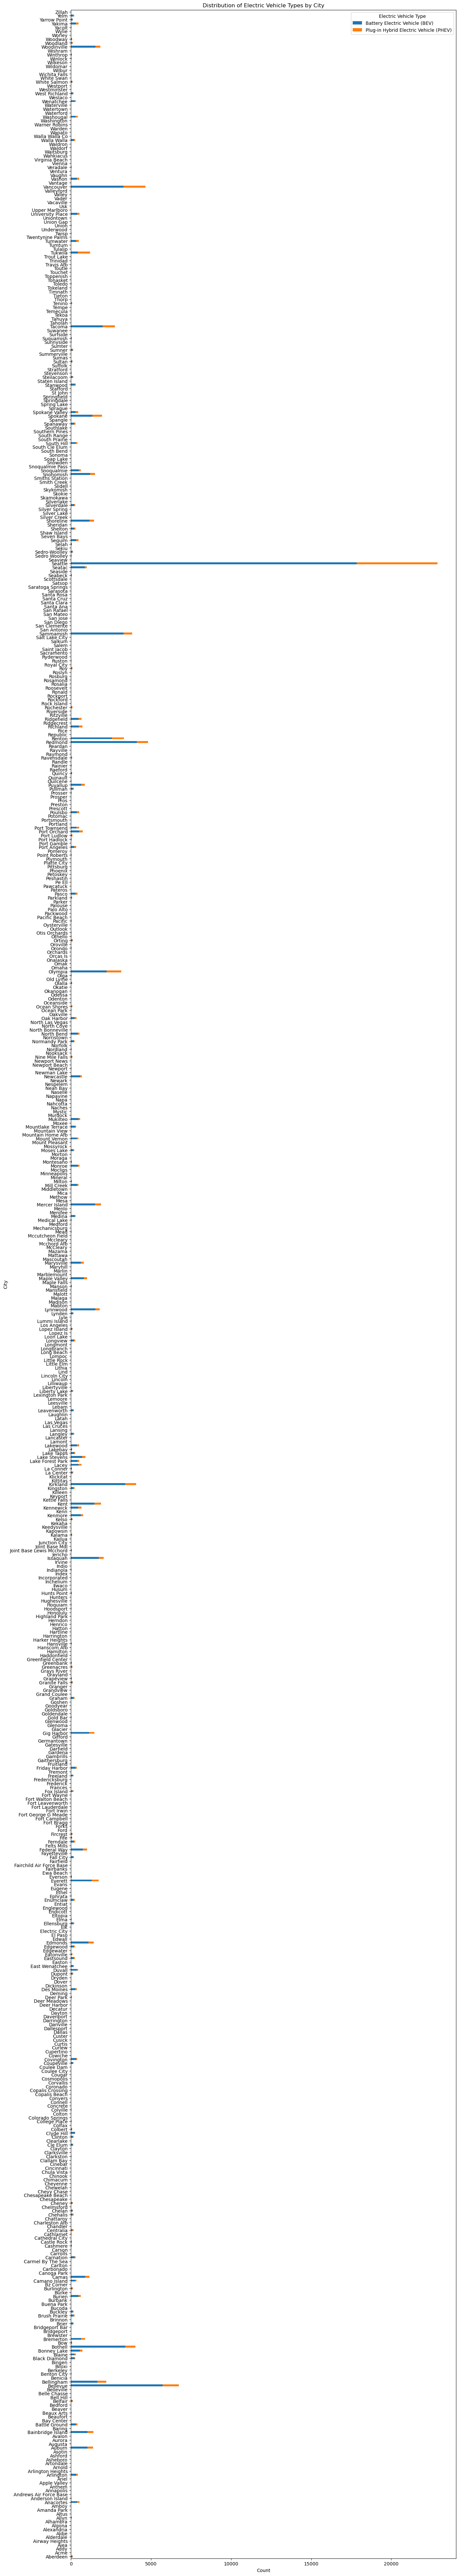

In [24]:
grouped_data = df.groupby(['City', 'Electric Vehicle Type']).size().unstack()

grouped_data.plot.barh(rot=0, figsize=(15,100), stacked=True)

plt.ylabel('City')
plt.xlabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')

plt.show()